In [1]:
import Pkg
using Unitful
using DifferentialEquations
using Plots

In [2]:
function GetInitialdrdtau(l, e, r_s, r0)
    A = e^2 -(1. - r_s/r0)*(1. + l^2/r0^2)
    return sqrt(A)*(e/(1. - r_s/r0))
end

struct Particle
    r::Array{Any, 1}
    theta::Array{Any, 1}
    t::Array{Any, 1}

    v_r::Array{Any, 1}
    v_theta::Array{Any, 1}
    v_t::Array{Any, 1}
    tau::Array{Any, 1}
    x::Array{Any, 1}
    y::Array{Any, 1}
end

function FormatSolution(Solution)

    v_r = []
    v_Theta = []
    v_t = []
    rs = []
    thetas = []
    times = []
    x = []
    y = []
    for Sol in Solution.u
        append!(v_r, Sol[1])
        append!(v_Theta, Sol[2])
        append!(v_t, Sol[3])
        append!(rs, Sol[4])
        append!(thetas, Sol[5])
        append!(times, Sol[6])
        append!(x, Sol[4] * cos(Sol[5]))
        append!(y, Sol[4] * sin(Sol[5]))
    end
    P = Particle(rs, thetas, times, v_r, v_Theta, v_t, Solution.t, x, y)
    return P
end;

function FindOrbit(Particle, MassOfBlackHole, ProperTimeSpan, Second)

    m = Particle[1]
    E = Particle[2]
    L = Particle[3]
    r_s = 2*MassOfBlackHole
    r0 = Particle[4]

    l = L/m
    e = E/m

    du0 = [GetInitialdrdtau(l, e, r_s, r0), (l/r0^2)*(e / (1. - r_s/r0)), (1. - r_s/r0)/e]

    if Second == false
        u0 = [r0, 0., 0.]
    else
        u0 = [2*r0, 0., 0.]
    end
    function Swarz!(ddu, du, u, p, t)
        ddu[1] = 0.5*(-r_s/u[1]^2 + (2*l^2)/u[1]^3 - (3*l^2*r_s)/u[1]^4)*(e / (1. - r_s/u[1]))
        du[2] = (l/u[1]^2)*(e / (1. - r_s/u[1]))
        du[3] = (1. - r_s/u[1])/e
    end

    Problem = SecondOrderODEProblem(Swarz!, du0, u0, ProperTimeSpan)
    Solution = solve(Problem, Rosenbrock23(), threading = true, saveat = 10)
    P = FormatSolution(Solution)

    return P
end;

In [81]:
MassOfBlackHole = 10
m = 1.e-5
E = 0.97*m
L = 4*m*MassOfBlackHole
r0 = 10.5*MassOfBlackHole #12
Particle1 = [m, E, L, r0]
ProperTimeSpan = [0., 50000] #[0., 20000.]

Object1 = FindOrbit(Particle1, MassOfBlackHole, ProperTimeSpan, false)

E = 0.965*m
Particle2 = [m, E, L, r0]
Object2 = FindOrbit(Particle2, MassOfBlackHole, ProperTimeSpan, true)

n = size(Object1.x)[1]

X = convert(Array{Float64,1}, Object1.x)
Y = convert(Array{Float64,1}, Object1.y)

X1 = convert(Array{Float64,1}, Object2.x)
Y1 = convert(Array{Float64,1}, Object2.y)

x(t) = 2*MassOfBlackHole*cos(t)
y(t) = 2*MassOfBlackHole*sin(t)

Int = 500
anim = @animate for i ∈ 1:n
    scatter([X[i]], [Y[i]], markersize = 4, markercolor = :green)
    scatter!([X1[i]], [Y1[i]], markersize = 4, markercolor = :red)
    plot!(x, y, 0, 2*pi, markercolor = :red, label = "Black Hole")
    plot!(xlims=[-Int, Int], ylims=[-Int, Int])
end

Animation("C:\\Users\\jdhoo\\AppData\\Local\\Temp\\jl_hvK6f9", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "004992.png", "004993.png", "004994.png", "004995.png", "004996.png", "004997.png", "004998.png", "004999.png", "005000.png", "005001.png"])

┌ Info: Saved animation to 
│   fn = C:\Users\jdhoo\Desktop\PhysicsSimulations\Schwarzschild\anim_fps15.gif
└ @ Plots C:\Users\jdhoo\.julia\packages\Plots\hyS17\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\jdhoo\\Desktop\\PhysicsSimulations\\Schwarzschild\\anim_fps15.gif")
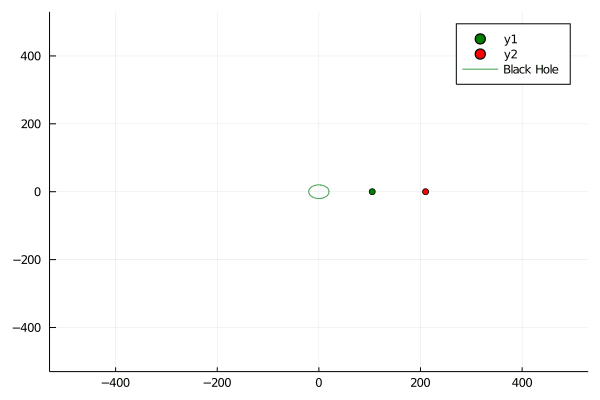

In [82]:
gif(anim, "anim_fps15.gif", fps = 2000)

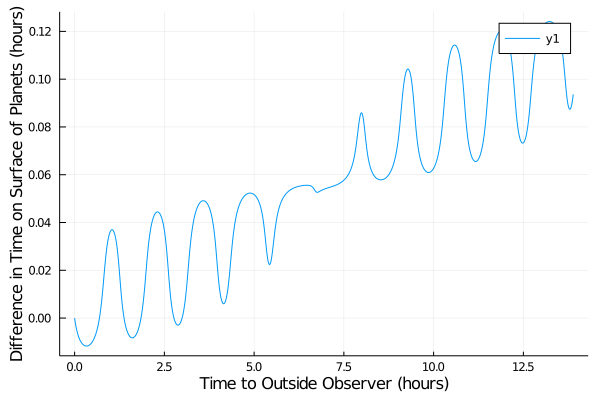

In [79]:
plot(Object1.tau/3600, (Object1.t-Object2.t)/3600, xlabel ="Time to Outside Observer (hours)" , ylabel ="Difference in Time on Surface of Planets (hours)")

#plot!(Object2.tau, Object2.t)